In [81]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Perf_store.csv', sep=';',header=0)
df.head(2)

,Store_code,Spend_ty,Quantity_ty,Visits_ty,Spend_ly,Quantity_ly,Visits_ly,store_format,PS,Country,tills
0,52594,17345427.0,1101360,221643,13399720.0,945140,204990,USAVE,0,SOUTH AFRICA,7
1,42266,86631440.0,2758686,441266,72563965.0,2658910,440794,CHECKERS,UM,SOUTH AFRICA,14


In [82]:
# outcome variable : Overall Performance 
df['growth_sales'] = df['Spend_ty'] / df['Spend_ly']-1
# continuous variables : Spend_ty	Quantity_ty	Visits_ty	Spend_ly	Quantity_ly	Visits_ly
# categorical variables : store_format	PS	Country

In [83]:
#Basic Descriptive Stat
print(df.dtypes)
print(len(df))

stat_spend=pd.pivot_table(df,index=["Country","store_format"],values=["Spend_ty","Spend_ly"],aggfunc=[np.sum, np.mean,np.std]) 
stat_quantity=pd.pivot_table(df,index=["Country","store_format"],values=["Quantity_ty","Quantity_ly"],aggfunc=[np.sum, np.mean,np.std]) 
stat_visits=pd.pivot_table(df,index=["Country","store_format"],values=["Visits_ty","Visits_ly"],aggfunc=[np.sum, np.mean,np.std]) 

stat_spend.head(5)
stat_quantity.head(5)
stat_visits.head(5)

Store_code        int64
Spend_ty        float64
Quantity_ty       int64
Visits_ty         int64
Spend_ly        float64
Quantity_ly       int64
Visits_ly         int64
store_format     object
PS               object
Country          object
tills             int64
growth_sales    float64
dtype: object
960


sum                    mean                \
                        Visits_ly Visits_ty     Visits_ly     Visits_ty   
Country  store_format                                                     
BOTSWANA CHECKERS         7448290   8443421  7.448290e+05  8.443421e+05   
         CHECKERS HYPER   2310453   2659398  1.155226e+06  1.329699e+06   
         SHOPRITE        22800676  23141325  9.913337e+05  1.006145e+06   
         SHOPRITE MINI     397541    652477  3.975410e+05  6.524770e+05   
         USAVE            1836148   2314532  2.040164e+05  2.571702e+05   

                                   std                 
                             Visits_ly      Visits_ty  
Country  store_format                                  
BOTSWANA CHECKERS        302540.741111  224961.001137  
         CHECKERS HYPER  664567.944337  302008.134672  
         SHOPRITE        203921.602231  161626.873327  
         SHOPRITE MINI             NaN            NaN  
         USAVE            75347.797161   73322.399515

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib64/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


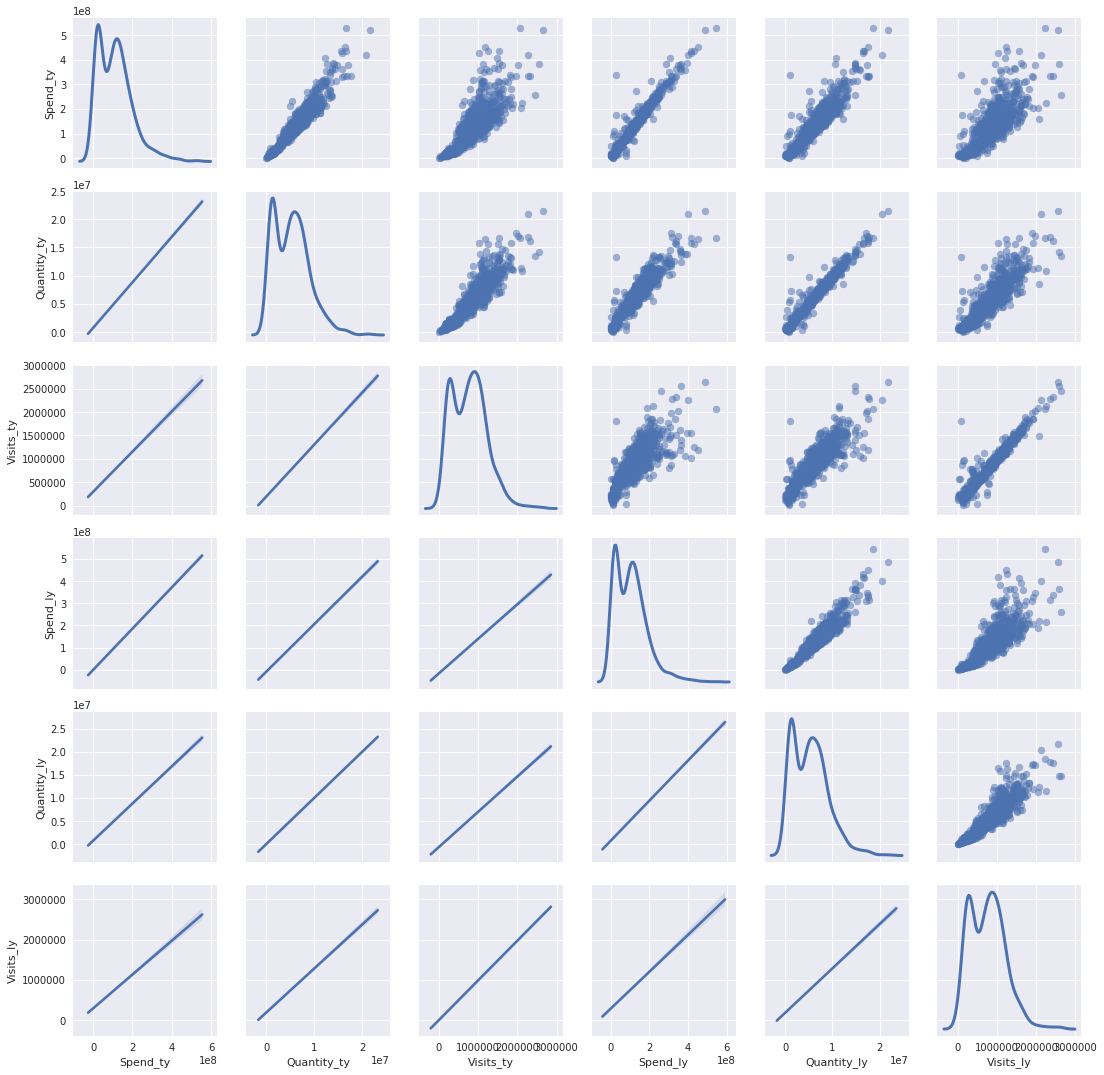

In [76]:
# Make the scatterplot matrix

# Take a subset of the data to make plots clearer.
df_rsa = df.loc[df['Country'] == 'SOUTH AFRICA']

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_rsa.loc[:, 'Spend_ty':'Visits_ly'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

                  Store_code  Spend_ty  Quantity_ty  Visits_ty  Spend_ly  \
Store_code          1.000000 -0.391827    -0.423301  -0.391799 -0.429944   
Spend_ty           -0.391827  1.000000     0.962954   0.847043  0.977832   
Quantity_ty        -0.423301  0.962954     1.000000   0.920216  0.945984   
Visits_ty          -0.391799  0.847043     0.920216   1.000000  0.831950   
Spend_ly           -0.429944  0.977832     0.945984   0.831950  1.000000   
Quantity_ly        -0.457668  0.937138     0.977628   0.902844  0.962885   
Visits_ly          -0.430310  0.813543     0.888541   0.969586  0.844921   
tills              -0.364489  0.824255     0.860489   0.807538  0.811213   
Average_Spend_ly   -0.306210  0.800904     0.688513   0.439702  0.773232   
Average_Spend_ty   -0.305897  0.790732     0.673415   0.420599  0.768680   
Qty_Basket_ty      -0.359094  0.738242     0.717190   0.449406  0.723805   
Qty_Basket_ly      -0.338895  0.734731     0.711220   0.440193  0.709563   
Average_Pric

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


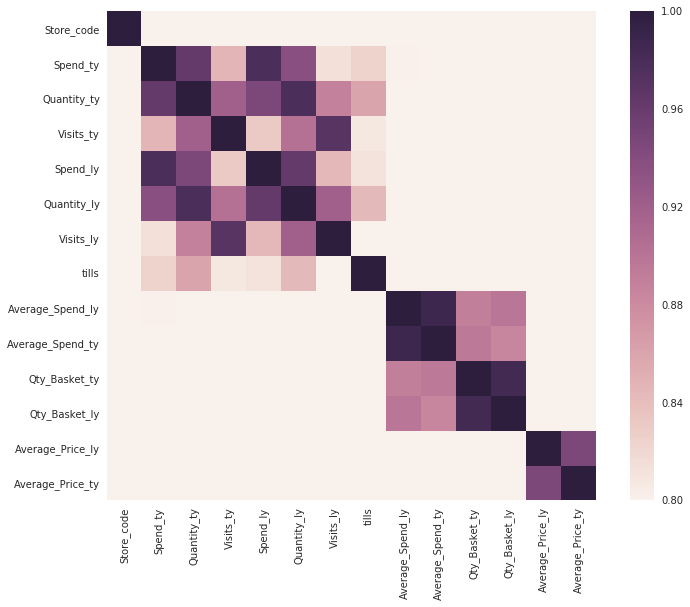

In [84]:
# Make the correlation matrix.
corrmat = df_rsa.corr()

print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmin=0.8, vmax=1, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

In [88]:
#Create Feature1

# Making dummies.
# Also creating a data frame to hold our features

features = pd.get_dummies(df['Country'])

# Nordic countries dummy.
features['NBLS'] = np.where((df['Country'].isin(['NAMIBIA', 'BOTSWANA'])), 1, 0)

print(pd.crosstab(features['NBLS'], df['Country']))

Country  BOTSWANA  LESOTHO  NAMIBIA  SOUTH AFRICA
NBLS                                             
0               0       32        0           766
1              45        0      117             0


In [89]:
#Create Feature2

features['Spend_10M'] = np.where(df['Spend_ty']>=100000000, 1, 0)

# Check to make sure it worked.
print(df['Spend_ty'].groupby(features['Spend_10M']).describe())

 #How do I add it into the dataframe ???
    

           count          mean           std          min           25%  \
Spend_10M                                                                 
0          438.0  4.132741e+07  2.794335e+07    1062882.0  2.012594e+07   
1          522.0  1.740305e+08  7.004803e+07  100016294.0  1.262654e+08   

                   50%           75%          max  
Spend_10M                                          
0           28607345.5  6.659414e+07   99870313.0  
1          152671210.0  2.005576e+08  529118773.0  


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


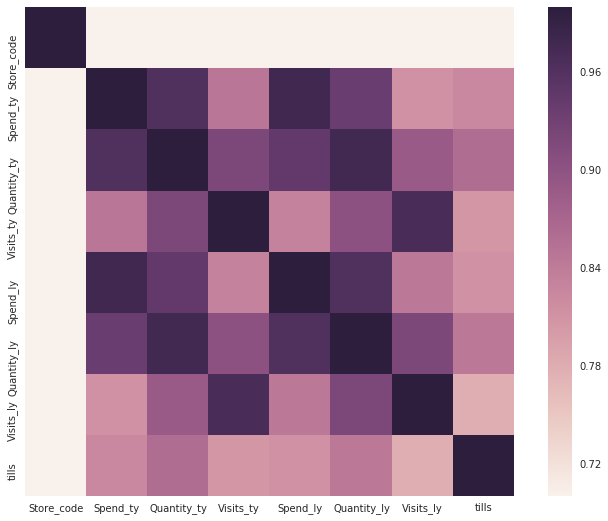

              Visits_ty  Visits_ly  Spend_ty  Spend_ly  Quantity_ty  \
Visits_ty      1.000000   0.969748  0.846764  0.831684     0.920084   
Visits_ly      0.969748   1.000000  0.813416  0.844658     0.888560   
Spend_ty       0.846764   0.813416  1.000000  0.977857     0.962960   
Spend_ly       0.831684   0.844658  0.977857  1.000000     0.946006   
Quantity_ty    0.920084   0.888560  0.962960  0.946006     1.000000   
Quantity_ly    0.902814   0.920195  0.937175  0.962870     0.977674   
adj_variable   0.946605   0.940633  0.958211  0.962520     0.985394   

              Quantity_ly  adj_variable  
Visits_ty        0.902814      0.946605  
Visits_ly        0.920195      0.940633  
Spend_ty         0.937175      0.958211  
Spend_ly         0.962870      0.962520  
Quantity_ty      0.977674      0.985394  
Quantity_ly      1.000000      0.986336  
adj_variable     0.986336      1.000000  


In [71]:
#create Feature3

corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmin=0.7, vmax=1, square=True)
plt.show()


# Looks like 'pplfair','ppltrst' and 'pplhlp' are pretty redundant with each
# other. Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = df[['Visits_ty','Visits_ly','Spend_ty','Spend_ly','Quantity_ty','Quantity_ly']].mean(axis=0)
stds = df[['Visits_ty','Visits_ly','Spend_ty','Spend_ly','Quantity_ty','Quantity_ly']].std(axis=0)
features['adj_variable'] = ((df[['Visits_ty','Visits_ly','Spend_ty','Spend_ly','Quantity_ty','Quantity_ly']] - means) / stds).mean(axis=1)


# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['Visits_ty','Visits_ly','Spend_ty','Spend_ly','Quantity_ty','Quantity_ly']]
plotdf['adj_variable'] = features['adj_variable'] 
corrmat2 = plotdf.corr()

print(corrmat2)


In [73]:
#create Feature4

df['Average_Spend_ly'] = df['Spend_ly'] / df['Visits_ly']
df['Average_Spend_ty'] = df['Spend_ty'] / df['Visits_ty']
df['Qty_Basket_ty'] = df['Quantity_ty'] / df['Visits_ty']
df['Qty_Basket_ly'] = df['Quantity_ly'] / df['Visits_ly']
df['Average_Price_ly'] = df['Spend_ly'] / df['Quantity_ly']
df['Average_Price_ty'] = df['Spend_ty'] / df['Quantity_ty']
df.head(5)

,Store_code,Spend_ty,Quantity_ty,Visits_ty,Spend_ly,Quantity_ly,Visits_ly,store_format,PS,Country,tills,Average_Spend_ly,Average_Spend_ty,Qty_Basket_ty,Qty_Basket_ly,Average_Price_ly,Average_Price_ty
0,52594,17345427.0,1101360,221643,13399720.0,945140,204990,USAVE,0,SOUTH AFRICA,7,65.367676,78.258402,4.969072,4.610664,14.177498,15.749098
1,42266,86631440.0,2758686,441266,72563965.0,2658910,440794,CHECKERS,UM,SOUTH AFRICA,14,164.621036,196.324756,6.251753,6.032092,27.290869,31.403154
2,571,148914415.0,7915687,884425,149373196.0,8542109,936705,SHOPRITE,0,SOUTH AFRICA,31,159.466637,168.374271,8.950094,9.119316,17.486688,18.812570
3,52617,26884390.0,1747856,332822,25083114.0,1905165,353377,USAVE,0,SOUTH AFRICA,7,70.981173,80.777082,5.251624,5.391310,13.165849,15.381353
4,50,95311624.0,5279075,867033,89101508.0,5405613,853073,SHOPRITE,LA,SOUTH AFRICA,18,104.447694,109.928485,6.088667,6.336636,16.483146,18.054607


              Store_code  Spend_ty  Quantity_ty  Visits_ty  Spend_ly  \
Store_code      1.000000 -0.363962    -0.390591  -0.353648 -0.401325   
Spend_ty       -0.363962  1.000000     0.964612   0.843347  0.976941   
Quantity_ty    -0.390591  0.964612     1.000000   0.917140  0.945442   
Visits_ty      -0.353648  0.843347     0.917140   1.000000  0.824329   
Spend_ly       -0.401325  0.976941     0.945442   0.824329  1.000000   
Quantity_ly    -0.424448  0.937702     0.976195   0.896992  0.963834   
Visits_ly      -0.392328  0.808928     0.884386   0.967341  0.839484   
tills          -0.361263  0.830234     0.866430   0.812863  0.818302   
growth_sales    0.127739 -0.072762    -0.085531  -0.083279 -0.170278   

              Quantity_ly  Visits_ly     tills  growth_sales  
Store_code      -0.424448  -0.392328 -0.361263      0.127739  
Spend_ty         0.937702   0.808928  0.830234     -0.072762  
Quantity_ty      0.976195   0.884386  0.866430     -0.085531  
Visits_ty        0.896992  

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


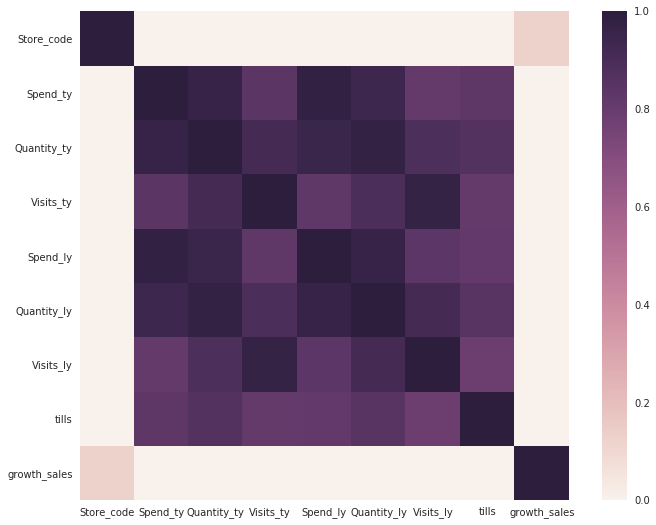

In [90]:
# Make the correlation matrix.
df_rsa = df.loc[df['Country'] == 'SOUTH AFRICA']

corrmat = df_rsa.corr()

print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmin=.0, vmax=1, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.